# Single Catenary Line

## Setup

- We first install all necessary packages.

In [140]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [141]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [142]:
pip install matplotlib

- We next import the packages using the following commands.

In [143]:
import numpy as np
import math as math
from scipy import optimize
import matplotlib.pylab as plt
from matplotlib.legend_handler import HandlerLine2D

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 7,4
pass

## Define properties of the line

|    |
| ---- |
| <img width="100%" src="./img/schematic.png" /> |
| Schematic of the mooring line |


Keeping all variables in SI Units (kg, m, s) and force in Newton (N

The properties of the line are

1. W_pm = Mass per meter (kg/m). (Remains constant)
2. EA = Elastic stiffness of the line. (Remains constant)
3. L_tot = Total length of the line. (Remains constant)
4. L_susp = Length of the line that is suspended in the water. (Changes with loading)

Positioning of the line

- At anchor, (x_AN,z_AN) = (0,0)
- At fairlead (x_FL, z_FL)

Forces at the end points of the line

- At anchor (H_AN, V_AN) 
    - For this exercise we restrict V_AN = 0. This implies that the a portion of the chain always remains on the groud.
- At fairlead (H_FL,V_FL) 
    - This is the load applied on the catenary line.
    - Fairlead is the point at which the line is attached to the floating body.
    - V_FL is primarily due to the weight of the suspended portion of the chain itself.
- Assuming no drag load on the line.
    - `H_AN = H_FL` (Eq. 1)
 

Hence the unknowns in the system are

- L_susp
- H_FL (-H_AN)
- V_FL
- x_FL
- z_FL

So we have 5 unknowns in the systems!

We now define the physical properties of the line.

In [154]:
g = 9.81 #m/s2
W_pm = 376 #kg/m
EA = 1725 * 10**6 #N
L_tot = 180 #m

## Functions for solving the single line system 

We define a function `catenary_end_xz()` where

- Constants: W_pm, EA, L_Tot
- Input: V_AN, H_FL, L_susp
- Output: x_FL, z_FL

This function hence returns the end position of the fairlead, given the horizontal force applied at the fairlead and the length of the suspended portion of the line.

In [155]:
def catenary_end_xz(W_pm, L_tot, EA, V_AN, H_AN, L_susp):
    
    W = W_pm*L_susp*g
        
    s = L_susp    
    z_t1 = 1 + (V_AN/H_AN)**2
    z_t2 = 1 + ((V_AN - W*s/L_susp)/H_AN)**2
    z = W*s/EA * (s/2/L_susp - V_AN/W) - H_AN*L_susp/W*(np.sqrt(z_t1) - np.sqrt(z_t2))            
    x_susp = H_AN*s/EA + H_AN*L_susp/W*(np.arcsinh(V_AN/H_AN) - np.arcsinh((V_AN - W*s/L_susp)/H_AN))
    x_bed = L_tot - L_susp
    x = x_bed + x_susp
        
    return x, z

We test the above function for a hypothetical line with

In [156]:
V_AN = 0
H_FL = 106000 #N (=H_AN)
L_susp = 150
x_FL, z_FL = catenary_end_xz(W_pm, L_tot, EA, V_AN, H_FL, L_susp)

print("Position of the fairlead are (x_FL, z_FL) = ", f"{x_FL:.5}", f"{z_FL:.5}" )

Position of the fairlead are (x_FL, z_FL) =  97.675 124.01


## Plotting the entire catenary line

We would like to see how this line actually looks. 
To do this we define the following function `plot_catenary_xz()` where

- Constants: W_pm, EA, L_Tot
- Input: V_AN, H_FL or H_AN, L_susp, ds
    - Here `ds` is the resolution at which the line is plotted. 
- Output: Plot of the catenary line

This function hence plot of the entire line, given the horizontal force applied at the fairlead and the length of the suspended portion of the line.

In [157]:
def plot_catenary_xz(W_pm, L_tot, EA, V_AN, H_AN, L_susp, ds):
        
    W = W_pm * L_susp * g
    
    # c_s = [0]
    # c_x = [L_tot - L_susp]
    # c_z = [0]
    # c_H = [H_AN]
    # c_V = [V_AN]
    
    c_s = [0, 0]    
    c_x = [0, L_tot - L_susp]
    c_z = [0, 0]
    c_H = [H_AN, H_AN]
    c_V = [V_AN, V_AN]
    
    Ns = math.floor(L_susp/ds)
    ds = L_susp/Ns
    for i in range(1,Ns+1):
        s = c_s[-1]+ds        
        z_t1 = 1 + (V_AN/H_AN)**2
        z_t2 = 1 + ((V_AN - W*s/L_susp)/H_AN)**2
        z = W*s/EA * (s/2/L_susp-V_AN/W) - H_AN*L_susp/W*(np.sqrt(z_t1) - np.sqrt(z_t2))        
        x_susp = H_AN*s/EA + H_AN*L_susp/W*(np.arcsinh(V_AN/H_AN) - np.arcsinh((V_AN - W*s/L_susp)/H_AN))        
        V = V_AN + W_pm*s*g
        x = L_tot - L_susp + x_susp
        
        c_s.append(s)        
        c_x.append( x )
        c_z.append( z )        
        c_V.append( V )
        
    print(c_s[-1], c_x[-1], c_z[-1], c_V[-1])
        
    return c_s, c_x, c_z, c_V

149.99999999999577 97.67545259205711 124.0145605784584 553283.9999999844


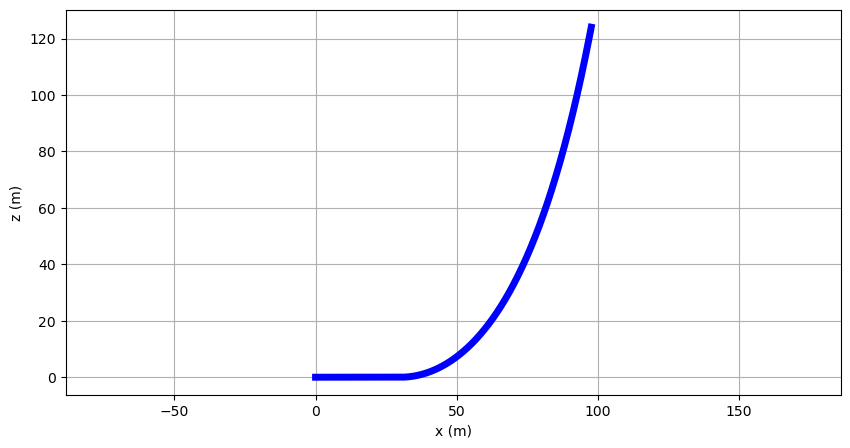

In [158]:
#Plot Calculation with Hypothetical Line

l2_s, l2_x, l2_z, l2_V = plot_catenary_xz(W_pm, L_tot, EA, V_AN, H_FL, L_susp, 0.1)

plt.figure(figsize=(10, 5))
plt.plot(l2_x, l2_z, 'b-', lw=5)
plt.axis("equal")
plt.grid("on")
plt.xlabel('x (m)')
plt.ylabel('z (m)')
plt.show()
pass

## Solution for H_AN and L_susp

- In the previous section we were solving for the end position of the fairlead (x_FL, z_FL), given the forces acting on the line and the suspended length of the line
- However, physically, we can easily measure the x_FL and z_FL, but its often difficult to measure the H_FL and L_susp.
- Therefore we need to do the inverse of the `catenary_end_xz()` function.
- Due to the nature of the catenary equation, it is not possible to directly invert the function
- Therefore, we will invert the function numerically, using an *iterative optimisation*.

The following cell solves for H_FL and L_Susp.
- Constants: W_pm, EA, L_Tot
- Input: x_FL, z_FL, V_AN
- Output: H_FL, L_susp

The *iterative* algorithm works as follows. Here (x_FL, z_FL) is the known end position of the fairlead.

1. Assume a guess value for H_FL, L_susp
2. Solve for x_FL, z_FL using `catenary_end_xz()` using this guess value of H_FL, L_susp. Lets call these x_FL_k, z_FL_k, where _k_ is the iteration number.
3. We are trying to enforce `(x_FL_k - x_FL)=0` and `(yEnd_k - yEnd)=0` (note, two eqns, two unknowns)
    - We enforce this by checking the error `abs(x_FL_k - x_FL)` and `abs(yEnd_k - yEnd)`.
5. If the error tends to 0 then we have obtained the solution for H_FL and L_susp
6. If the error >> 0, then move onto the next iteration (k = k+1).
    - In iteration _k+1_ the guess values of H_FL and L_susp are updated based on the error.

Once we know the L_susp, we can also calculate the V_FL as the weight of the suspended portion of the line using

`V_FL = L_susp x W_pm x g`


In [159]:
def inv_catenary_end_xz(W_pm, L_tot, EA, V_AN, x_FL, z_FL):    

    def objective_fnc(sol, *data):        
        H_AN = sol[0]
        L = sol[1] #suspended length
        W_pm, L_tot, EA, V_AN, xtarg, ztarg  = data
        x, z = catenary_end_xz(W_pm, L_tot, EA, V_AN, H_AN, L)
        
        return np.array( [abs(ztarg-z),  abs(xtarg-x)] )

    data = (W_pm, L_tot, EA, V_AN, x_FL, z_FL)
    H_FL, L_susp = optimize.fsolve(objective_fnc,np.array([10,10]),args=data)
    V_FL = L_susp * W_pm * g

    return H_FL, V_FL, L_susp

Lets test this *iterative* solution procedure.

We will prescribe the end positions of the fairlead as x_FL, z_FL = (450, 250) meter.

Using this we will solve for the inverse of `caternary_end_xz()` function as follows.

You can recheck this solution by passing the calculated solution for the (H_FL, L_susp) into a previous `catenary_end_xz()` function to confirm if the inverse was calculated correctly.

You can also plot this line using `plot_catenary_xz()`.

150.35491430883218 98.00000000001164 124.00000000000074 554593.122722986


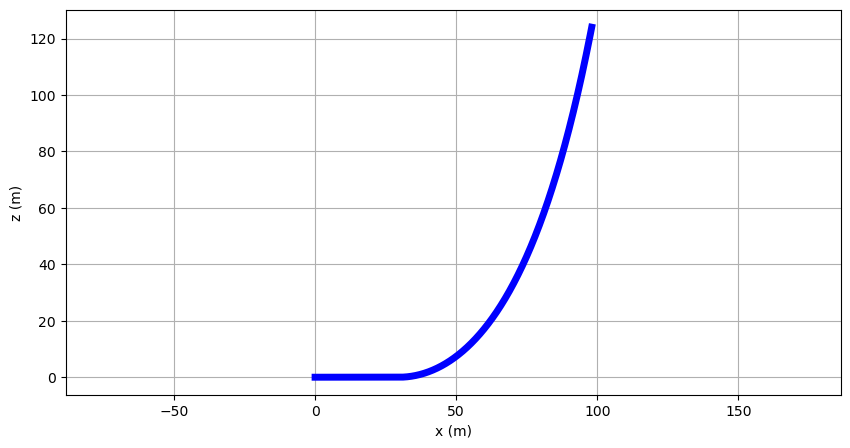

In [160]:
x_FL = 98
z_FL = 124

H_FL_calc, V_FL_calc, L_susp_calc = inv_catenary_end_xz(W_pm, L_tot, EA, V_AN, x_FL, z_FL)

# print("Prescribed position of the fairlead was (x_FL, z_FL) =", f"{x_FL,.5}", f"{z_FL,.5}")
# print("Calculated Horizontal Force ","H_FL ",f"{H_FL_calc/1000:.4}","kN ")
# print("Calculated Vertical Force fairlead ","V_FL ",f"{V_FL_calc/1000:.5}","kN ")
# print("Calculated Suspended length ","Ls ",f"{L_susp_calc:.4}","m ")

l2_s, l2_x, l2_z, l2_V = plot_catenary_xz(W_pm, L_tot, EA, V_AN, H_FL_calc, L_susp_calc, 0.1)

plt.figure(figsize=(10, 5))
plt.plot(l2_x, l2_z, 'b-', lw=5)
plt.axis("equal")
plt.grid("on")
plt.xlabel('x (m)')
plt.ylabel('z (m)')
plt.show()
pass

So now we have the ability to calculate


`catenary_end_xz()`
- Constants: W_pm, EA, L_Tot
- Input: V_AN, H_FL or H_AN, L_susp
- Output: x_FL, z_FL

`inv_catenary_end_xz()`
- Constants: W_pm, EA, L_Tot
- Input: V_AN, x_FL, z_FL
- Output: H_FL, V_FL, L_susp

## Trial Run

You can use the followinf cells to play with the code.
Here you can specify various fairlead position x_FL z_FL and observe how the H_FL, L_susp and the plot of the line change.

Prescribed position of the fairlead was (x_FL, z_FL) = 98 124
Calculated Horizontal Force  H_FL  107.7 kN 
Calculated Vertical Force fairlead  V_FL  554.59 kN 
Calculated Suspended length  Ls  150.4 m 
150.35491430883218 98.00000000001164 124.00000000000074 554593.122722986


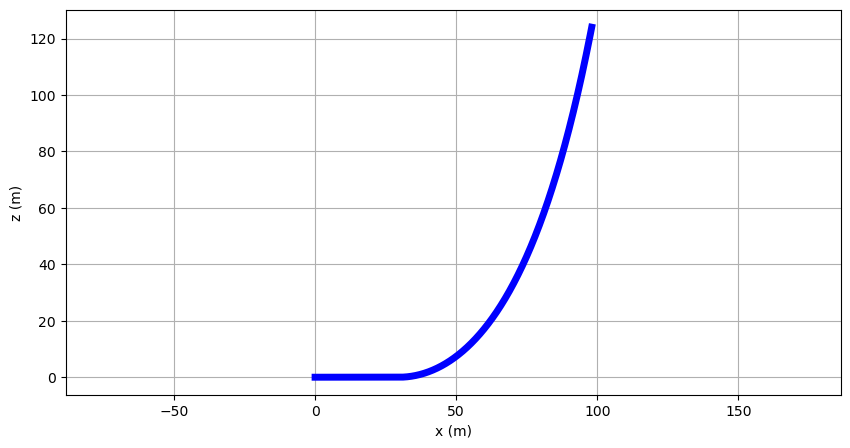

In [161]:
g = 9.81 #m/s2
W_pm = 376 #kg/m
EA = 1725 * 10**6 #N
L_tot = L_tot #m
V_AN = 0

x_FL = x_FL
z_FL = z_FL

H_FL_calc, V_FL_calc, L_susp_calc = inv_catenary_end_xz(W_pm, L_tot, EA, V_AN, x_FL, z_FL)

print("Prescribed position of the fairlead was (x_FL, z_FL) =", x_FL, z_FL)
print("Calculated Horizontal Force ","H_FL ",f"{H_FL_calc/1000:.4}","kN ")
print("Calculated Vertical Force fairlead ","V_FL ",f"{V_FL_calc/1000:.5}","kN ")
print("Calculated Suspended length ","Ls ",f"{L_susp_calc:.4}","m ")

l2_s, l2_x, l2_z, l2_V = plot_catenary_xz(W_pm, L_tot, EA, V_AN, H_FL_calc, L_susp_calc, 0.1)

plt.figure(figsize=(10,5))
plt.plot(l2_x, l2_z, 'b-', lw=5)
plt.axis("equal")
plt.grid("on")
plt.xlabel('x (m)')
plt.ylabel('z (m)')
plt.show()
pass

## Force-excursion diagram

- Consider a catenary line which has a total length (L_tot) = 250 m.
- We now evaluate the horizontal force (H_AN) for a range of x_FL.
- The plot of H_AN vs x_FL is the force-excursion plot.
- Here the z_FL can be fixed as the still-water depth (d0) = 80 m

[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179]


<Figure size 700x400 with 0 Axes>

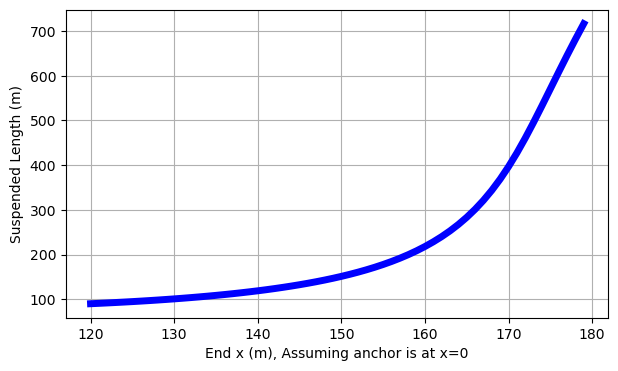

<Figure size 700x400 with 0 Axes>

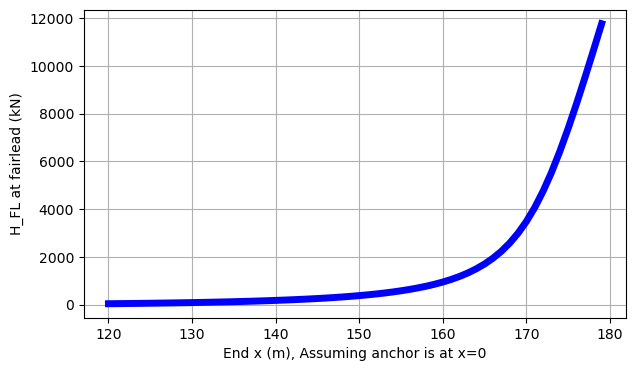

<Figure size 700x400 with 0 Axes>

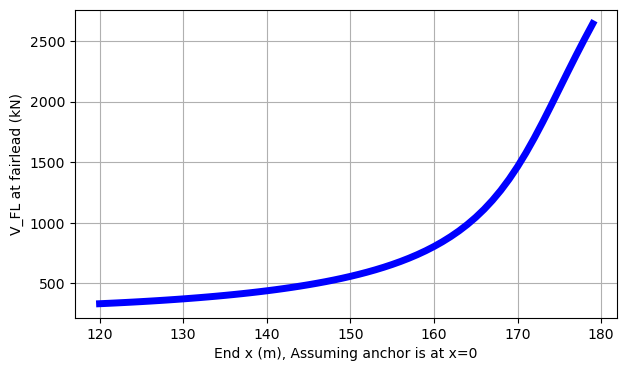

In [162]:
# Still-water depth (taken equal as fairlead position)
d0 = 80 #m

# Properties of the line
g = 9.81 #m/s2
W_pm = 376 #kg/m
EA = 1725 *10**6 #N
L_tot = L_tot #m
V_AN = 0

# Setting vertical position as water-depth 
z_FL = d0

# INPUT the target excursion: from 200 to 250 m
x_FL_array = np.arange(120, 180)
print(x_FL_array)

sol_array = [inv_catenary_end_xz(W_pm, L_tot, EA, V_AN, lx_FL, z_FL) for lx_FL in x_FL_array]

H_FL_array = [sol[0] for sol in sol_array]
V_FL_array = [sol[1] for sol in sol_array]
L_susp_array = [sol[2] for sol in sol_array]
# print(x_FL_array[1], H_AN_array[1]/1000)
# print(x_FL_array[-1], H_AN_array[-1]/1000)

plt.figure(figsize=(7,4))
plt.subplots(1,1)
plt.plot( x_FL_array, L_susp_array, 'b-', lw=5)
plt.grid("on")
plt.xlabel('End x (m), Assuming anchor is at x=0')
plt.ylabel('Suspended Length (m)')
#plt.xlim(left=549, right=551)
#plt.ylim(bottom=2350, top=2450)
plt.show()


plt.figure(figsize=(7,4))
plt.subplots(1,1)
plt.plot( x_FL_array, [Hl/1000 for Hl in H_FL_array], 'b-', lw=5)
plt.grid("on")
plt.xlabel('End x (m), Assuming anchor is at x=0')
plt.ylabel('H_FL at fairlead (kN)')
#plt.xlim(left=549, right=551)
#plt.ylim(bottom=2350, top=2450)
plt.show()

plt.figure(figsize=(7,4))
plt.subplots(1,1)
plt.plot( x_FL_array, [Vstep/1000 for Vstep in V_FL_array], 'b-', lw=5)
plt.grid("on")
plt.xlabel('End x (m), Assuming anchor is at x=0')
plt.ylabel('V_FL at fairlead (kN)')
plt.show()
pass

We can calculate the horizontal and vertical stiffness stiffness of the line by checking the slope of the force excursion diagram.

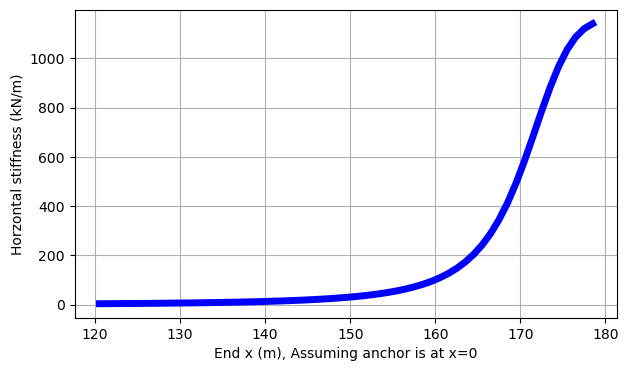

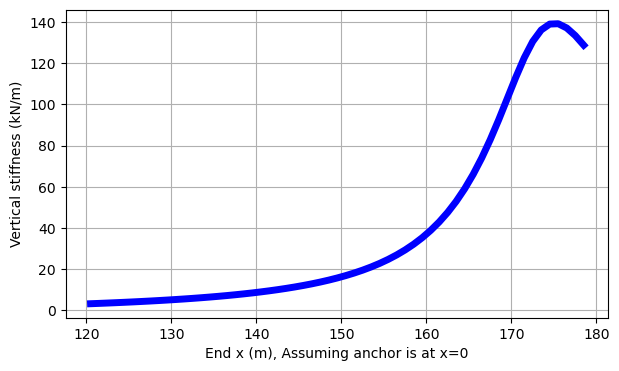

In [163]:
dx = x_FL_array[1]-x_FL_array[0]

# We evaluate the slope using the central difference method.
# dH/dx [i+1/2] = (H[i+1] - H[i])/dx
H_FL_slope = [ (l1-l2)/dx for (l1,l2) in zip(H_FL_array[1:], H_FL_array[0:-1])]
V_FL_slope = [ (l1-l2)/dx for (l1,l2) in zip(V_FL_array[1:], V_FL_array[0:-1])]
x_FL_array2 = [ lx+dx/2 for lx in x_FL_array[0:-1] ]

plt.figure(figsize=(7,4))
plt.plot( x_FL_array2, [Hl/1000 for Hl in H_FL_slope], 'b-', lw=5)
plt.grid("on")
plt.xlabel('End x (m), Assuming anchor is at x=0')
plt.ylabel('Horzontal stiffness (kN/m)')
#plt.xlim(left=549, right=551)
#plt.ylim(bottom=2350, top=2450)
plt.show()

plt.figure(figsize=(7,4))
plt.plot( x_FL_array2, [Vl/1000 for Vl in V_FL_slope], 'b-', lw=5)
plt.grid("on")
plt.xlabel('End x (m), Assuming anchor is at x=0')
plt.ylabel('Vertical stiffness (kN/m)')
plt.show()


pass